In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from glob import glob
from PIL import Image

In [138]:
RANDOM_CROP_FACTOR = 2  #for dev purposes

def read_galaxy(images, labels):
    RANDOM_CROP_FACTOR = 2  #for dev purposes
    random_crop = []
    image_rot = []
    random_flip = []
    final = []
    label_list1 =[]
    label_list2=[]
    numpy_dict = {}
    
    #data augmentation
    for j in range(len(images)):
        for i in range(RANDOM_CROP_FACTOR):
            im = tf.convert_to_tensor(images[i], dtype=tf.float32)
            random_crop.append(tf.image.random_crop(images[i], [64, 64, 3]))
            label_list1.append(labels[j])

    for i in range(len(random_crop)):
        for j in range(4):
            image_rot.append(tf.image.rot90(random_crop[i],k=random.randint(0,3)))
            label_list2.append(label_list1[i])

    label_list1 =[]
    for i in range(len(image_rot)):
        for j in range(2):
            random_flip.append(tf.image.random_flip_left_right(image_rot[i]))
            label = tf.cast(label_list2[i], tf.int32)
            label_list1.append(label.numpy())

    for i in range(len(random_flip)):    
        im = tf.image.random_brightness(random_flip[i], max_delta=63)
        im = tf.image.random_contrast(im,lower=0.2,upper=1.8) 
#         im = tf.image.per_image_standardization(im) 
        final.append(im.numpy())
    
    for final,label_list1 in zip(final,label_list1):
        numpy_dict[label_list1] = final
    np.save('Preprocess2.npy', numpy_dict)

In [139]:
b = np.load('Preprocess2.npy', allow_pickle=True)
images1 = []
label1 = []
for k,v in b.item().items():
    images1.append(v)
    label1.append(k)
    

In [140]:
read_galaxy(images,label)
# len(im), len(lb)

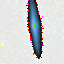

In [141]:
Image.fromarray(np.uint8(images1[2]))